# SpaceX Falcon 9 First Stage Landing Prediction

## Part III: Visualizing the Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The first thing we do is import the dataframe from the CSV file generated previously

In [2]:
df=pd.read_csv('dataset_api.csv')
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


There are a couple of things we want to visualize in this data. 

To start, we want to see the role of variables Flight Number, Payload Mass and Launch Station on the outcomes of the missions.

### Flight Number and Payload Mass vs Outcome

Let's visualize a scatterplot the Flight Number and Payload of all launches

C:\Users\paolo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


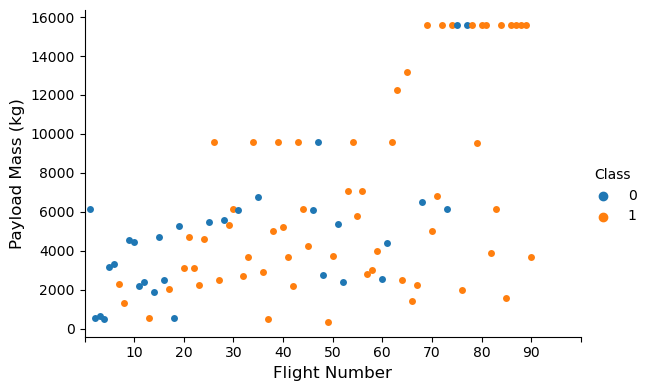

In [3]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 1.5, height=4)
plt.xlabel("Flight Number",fontsize=12)
plt.xticks(np.arange(-1, 100, step=10))
plt.ylabel("Payload Mass (kg)",fontsize=12)
plt.show()

Here, the orange class represents Success and the blue one Failure. 

First off, we see that the overall fraction of Successes becomes larger as Flight Number increases. Secondly, the average Payload Mass also increases with time. Both of these observations indicate that the technology behind Falcon 9 is maturing over time and becoming capable of handling heavier payloads while also increasing the chance of success.

We also see that many of the more recent missions carried a 16 ton payload, being mostly succesful.

### Flight Number and Launch Site vs Outcome

Now, we plot the Flight Number and Launch Site of all missions to check what the location of the launch has do with the mission outcomes

C:\Users\paolo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


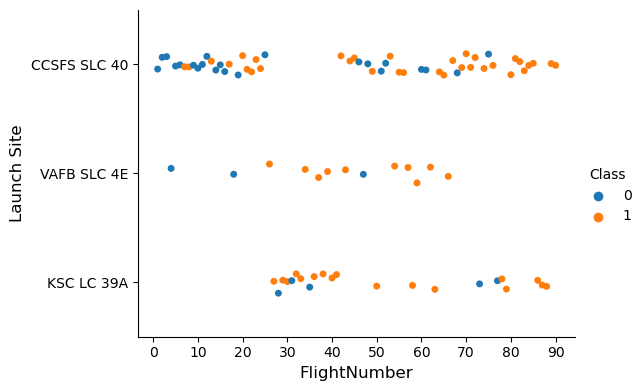

In [4]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 1.5, height=4)
plt.xlabel("FlightNumber",fontsize=12)
plt.xticks(np.arange(0, 100, step=10))
plt.ylabel("Launch Site",fontsize=12)
plt.show()

A couple things worth noticing is that the first launches happened primarily at CCSFS (Cape Canaveral Space Force Station, Florida) and consisted mostly of failures. As time went by, the VAFB (Vandenberg Air Force Base, California) and the KSC (Kennedy Space Center, Florida) started operating. The overall success rate increased over time for all stations.

The last scatter plot to check is Payload mass AND Launch Site vs Outcome

C:\Users\paolo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


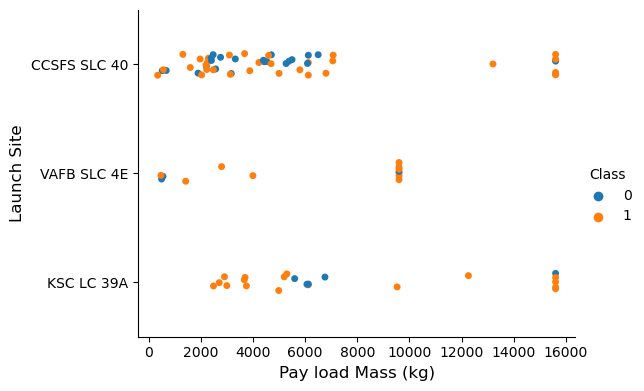

In [5]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 1.5, height=4)
plt.xlabel("Pay load Mass (kg)",fontsize=12)
plt.ylabel("Launch Site",fontsize=12)
plt.show()

In this plot we can see the distribution of the payload masses for the three stations. Particularly, missions at the KSC covered a broad range of payloads, where as for VAFB they were more concentrated at 10 tons. The CCSFS has the majority of the missions with light payloads (likely the first missions to be carried), and, similar to KSC, has a significant number of missions with the 16 ton payload.

Having seen the role of Flight Number, Payload Mass and Launch Station, we now want to examine the role of the Orbit on the Outcome. For that, we will plot, for each Orbit, what is the Success Rate (percentage of positive outcomes) and the Mission Count (number of missions carried at that orbit).

### Success Rate for each Orbit

We will make use of Seaborn's barplot for these graphs.

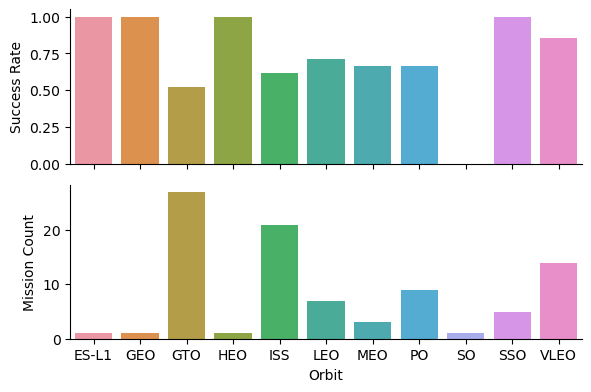

In [6]:
tsk3 = pd.DataFrame(columns=['Means, Count'])

tsk3 = df.groupby('Orbit',as_index=False)['Class'].mean()

tsk3['Counts'] = df.groupby('Orbit',as_index=False)['Class'].count()['Class']

tsk3.columns = ['Orbit', 'Success Rate', 'Mission Count']

g = sns.PairGrid(tsk3, y_vars=['Success Rate','Mission Count'], x_vars=['Orbit'], height=2, aspect=3)

g.map(sns.barplot)

Here we see the proability of success for each orbit as well as their overall count. In particular, we notice that GTO, ISS, PO and VLEO are the most common orbits. Out of these, VLEO is the one with the higher sucess rate of about 0.8. Is this because of the orbit itself or because this orbit started to be utilized when the technology became better?

To answer this question, we need to see how the Flight Number and Orbit are related to each other.

### Flight Number and Orbit vs Outcome

C:\Users\paolo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(37.17163194444444, 0.5, 'Orbit')

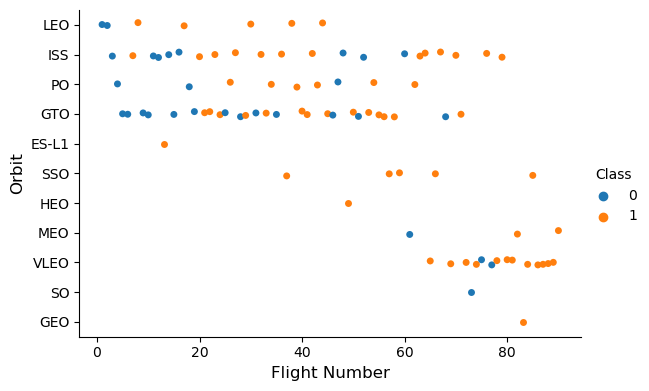

In [7]:
sns.catplot(data=df, x='FlightNumber', y='Orbit', hue='Class', aspect=1.5, height=4)
plt.xlabel("Flight Number",fontsize=12)
plt.ylabel("Orbit",fontsize=12)

It seems like, for all orbits, the chance of success are increasing over time. VLEO, which we noticed before as having a large mission count and success rate is indeed one of the more recent orbits in the list.

We now want to check the types of payloads that each of these orbits receive.

### Payload Mass and Orbit vs Outcome

C:\Users\paolo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(37.17163194444444, 0.5, 'Orbit')

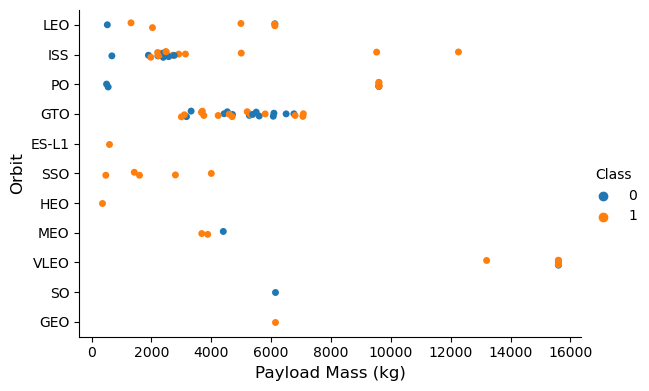

In [8]:
sns.catplot(data=df, x='PayloadMass', y='Orbit', hue='Class', aspect=1.5, height=4)
plt.xlabel("Payload Mass (kg)",fontsize=12)
plt.ylabel("Orbit",fontsize=12)

In this plot we can see the distribution of the payload masses for all orbits. Most orbits have well defined ranges of the payload masses, perhaps except LEO and ISS. Another thing to notice is that the missions carrying the 16 ton payload all happened at the VLEO orbit.

### Evolution of Success Rate across the years

The previous plots indicated that the probability of success was increasing with Flight Number. Here, we want to show that visually. We will plot the Success Rate (fraction of succesful missions) vs Year.

In [9]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head(2)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0


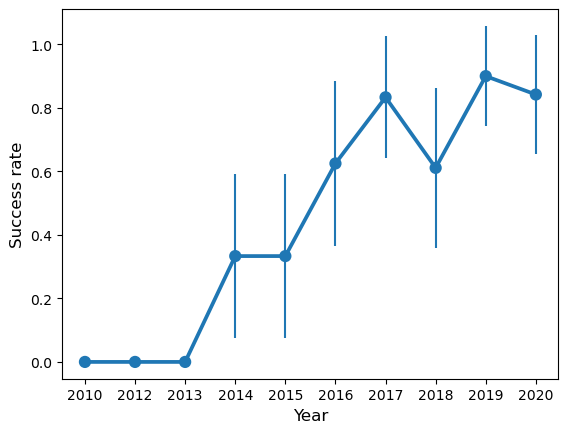

In [10]:
ts6 = df.groupby('Date', as_index=False)['Class'].mean()
ts6['Std'] = df.groupby('Date', as_index=False)['Class'].std()['Class']
ax = sns.pointplot(data=ts6, x='Date', y='Class')
ax.errorbar(ts6['Date'], ts6['Class'], yerr=ts6['Std']/2, fmt=' ', zorder=-1)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Success rate",fontsize=12)
colors = ['steelblue']*2 + ['coral']*2

As expected, the Success Rate increases over time, from 0 to about 0.8 in 2020. The error bars are the standard deviations in the Success Rate and also improve over time as the Success Rate approaches 1.